# Aiport Performance Analysis

Use data from US Dept of Transportation available at https://www.transtats.bts.gov/Homepage.asp from the Bureau of Transportation Statistics on flight delay and cancellation times to create actionable insights and data visualization.

## Data Exploration

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration
df_2009 = pd.read_csv("2009.csv")
print(df_2009.head())

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2009-01-01         XE               1204    DCA  EWR          1100   
1  2009-01-01         XE               1206    EWR  IAD          1510   
2  2009-01-01         XE               1207    EWR  DCA          1100   
3  2009-01-01         XE               1208    DCA  EWR          1240   
4  2009-01-01         XE               1209    IAD  EWR          1715   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1058.0       -2.0      18.0      1116.0  ...              62.0   
1    1509.0       -1.0      28.0      1537.0  ...              82.0   
2    1059.0       -1.0      20.0      1119.0  ...              70.0   
3    1249.0        9.0      10.0      1259.0  ...              77.0   
4    1705.0      -10.0      24.0      1729.0  ...             105.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                 68.0      42.0     199.0            NaN 

In [2]:
print(df_2009.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')


## Data Cleaning

In [3]:
df_2009 = df_2009.drop(columns=["Unnamed: 27"])

In [4]:
print(df_2009.isnull().sum())

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 82867
DEP_DELAY                82867
TAXI_OUT                 85787
WHEELS_OFF               85787
WHEELS_ON                89322
TAXI_IN                  89321
CRS_ARR_TIME                 0
ARR_TIME                 89322
ARR_DELAY               102361
CANCELLED                    0
CANCELLATION_CODE      6342300
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME     102362
AIR_TIME                102361
DISTANCE                     0
CARRIER_DELAY          5258837
WEATHER_DELAY          5258837
NAS_DELAY              5258837
SECURITY_DELAY         5258837
LATE_AIRCRAFT_DELAY    5258837
dtype: int64


In [5]:
# Dependent features like air time can be imputed - remove all entries with null values in independent features

df_2009 = df_2009.dropna(
    subset=["DEP_TIME", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "ARR_TIME"]
)
print(df_2009.isnull().sum())

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                    0
TAXI_OUT                     0
WHEELS_OFF                   0
WHEELS_ON                    0
TAXI_IN                      0
CRS_ARR_TIME                 0
ARR_TIME                     0
ARR_DELAY                13040
CANCELLED                    0
CANCELLATION_CODE      6340016
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      13040
AIR_TIME                 13040
DISTANCE                     0
CARRIER_DELAY          5169515
WEATHER_DELAY          5169515
NAS_DELAY              5169515
SECURITY_DELAY         5169515
LATE_AIRCRAFT_DELAY    5169515
dtype: int64


In [6]:
print(df_2009.shape)

(6340016, 27)


In [7]:
def subtract_time(time1, time2):
    # Extract hours and minutes from time integers
    hour1, minute1 = divmod(time1, 100)
    hour2, minute2 = divmod(time2, 100)

    # Convert to minutes
    total_min1 = 60 * hour1 + minute1
    total_min2 = 60 * hour2 + minute2

    # Perform subtraction
    min_subtracted = total_min1 - total_min2

    # Return the result as an integer in 24-hour time format
    return min_subtracted

In [8]:
print(subtract_time(1145, 1120))

25


In [9]:
# Impute all dependent variables

dependent_vars = ["ARR_DELAY", "AIR_TIME", "ACTUAL_ELAPSED_TIME"]
df_2009[dependent_vars[0]].fillna(
    subtract_time(df_2009["ARR_TIME"], df_2009["CRS_ARR_TIME"]), inplace=True
)
df_2009[dependent_vars[1]].fillna(
    subtract_time(df_2009["WHEELS_ON"], df_2009["WHEELS_OFF"]), inplace=True
)
df_2009[dependent_vars[2]].fillna(
    df_2009["AIR_TIME"] + df_2009["TAXI_IN"] + df_2009["TAXI_OUT"], inplace=True
)

print(df_2009.isnull().sum())

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                    0
TAXI_OUT                     0
WHEELS_OFF                   0
WHEELS_ON                    0
TAXI_IN                      0
CRS_ARR_TIME                 0
ARR_TIME                     0
ARR_DELAY                    0
CANCELLED                    0
CANCELLATION_CODE      6340016
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME          0
AIR_TIME                     0
DISTANCE                     0
CARRIER_DELAY          5169515
WEATHER_DELAY          5169515
NAS_DELAY              5169515
SECURITY_DELAY         5169515
LATE_AIRCRAFT_DELAY    5169515
dtype: int64


## Data Visualization

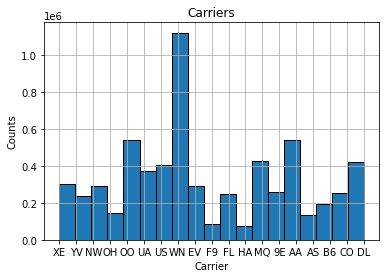

In [14]:
# Visualize the distribution of carriers

carrierslist = df_2009["OP_CARRIER"].tolist()
plt.figure(facecolor="white")
plt.title("Carriers")
plt.xlabel("Carrier")
plt.ylabel("Counts")
plt.hist(x=carrierslist, edgecolor="black", bins=19)
plt.grid(True)
plt.savefig("carriers.png")
plt.show()

In [18]:
# Find percentage of cancelled flights
percent_cancelled = (df_2009["CANCELLED"] == 1).size / df_2009.size
print(f"Percentage of cancellations: {round(percent_cancelled * 100, 2)}%")

Percentage of cancellations: 3.7%


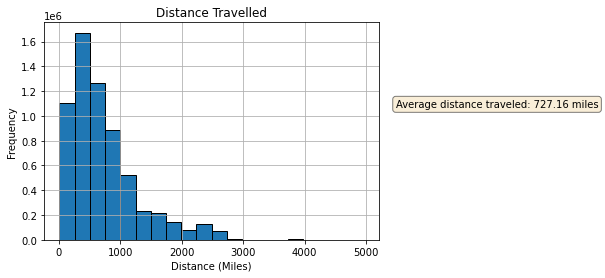

In [21]:
# Visualize the distribution of distance travelled
distancelist = df_2009["DISTANCE"].tolist()
avgdistance = np.mean(distancelist)
text = f"Average distance traveled: {round(avgdistance, 2)} miles"
plt.figure(facecolor="white")
plt.text(
    1.05,
    0.60,
    text,
    ha="left",
    va="bottom",
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
)
plt.title("Distance Travelled")
plt.xlabel("Distance (Miles)")
plt.ylabel("Frequency")
plt.hist(x=distancelist, edgecolor="black", bins=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("distance.png")
plt.show()